# Data Preprocessing

1. Customer Adress
2. Customer Demographic
3. New Customer List
4. Transactions
5. RFM

#  1. Customer Adres

In [ ]:
library(readxl)
library(DataExplorer)
library(tidyverse)
library(lubridate)
library(rstatix)

In [4]:
df_cus =as.data.frame(read_xlsx("../input/kpmg-virtual-internship/KPMG_VI_New_raw_data_update_final.xlsx", 
                            skip = 1, 
                            sheet = "CustomerAddress"))

In [5]:
head(df_cus)

,customer_id,address,postcode,state,country,property_valuation
,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9
6,7,4 Delaware Trail,2210,New South Wales,Australia,9


In [6]:
summary(df_cus)

  customer_id     address             postcode       state          
 Min.   :   1   Length:3999        Min.   :2000   Length:3999       
 1st Qu.:1004   Class :character   1st Qu.:2200   Class :character  
 Median :2004   Mode  :character   Median :2768   Mode  :character  
 Mean   :2004                      Mean   :2986                     
 3rd Qu.:3004                      3rd Qu.:3750                     
 Max.   :4003                      Max.   :4883                     
   country          property_valuation
 Length:3999        Min.   : 1.000    
 Class :character   1st Qu.: 6.000    
 Mode  :character   Median : 8.000    
                    Mean   : 7.514    
                    3rd Qu.:10.000    
                    Max.   :12.000    

In [7]:
str(df_cus)

'data.frame':	3999 obs. of  6 variables:
 $ customer_id       : num  1 2 4 5 6 7 8 9 11 12 ...
 $ address           : chr  "060 Morning Avenue" "6 Meadow Vale Court" "0 Holy Cross Court" "17979 Del Mar Point" ...
 $ postcode          : num  2016 2153 4211 2448 3216 ...
 $ state             : chr  "New South Wales" "New South Wales" "QLD" "New South Wales" ...
 $ country           : chr  "Australia" "Australia" "Australia" "Australia" ...
 $ property_valuation: num  10 10 9 4 9 9 4 12 8 4 ...


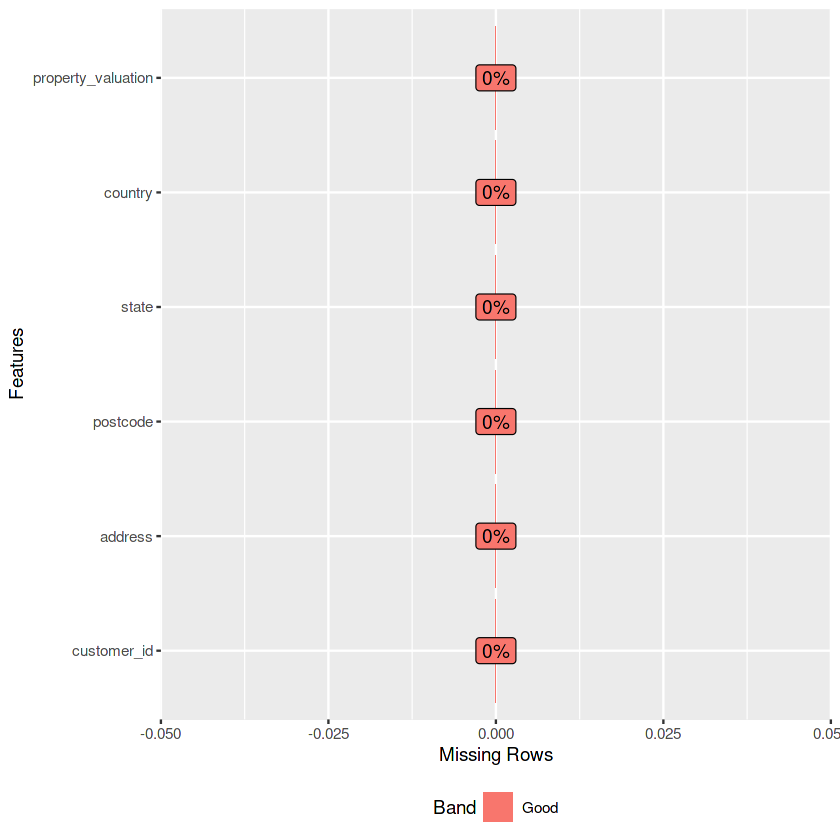

In [8]:
plot_missing(df_cus)

In [9]:
table(df_cus$state)
table(df_cus$country)


New South Wales             NSW             QLD             VIC        Victoria 
             86            2054             838             939              82 


Australia 
     3999 

In [10]:
df_cus$state = gsub("New South Wales", "NSW", df_cus$state)
df_cus$state = gsub("Victoria", "VIC", df_cus$state)

In [11]:
head(df_cus)

,customer_id,address,postcode,state,country,property_valuation
,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,1,060 Morning Avenue,2016,NSW,Australia,10
2,2,6 Meadow Vale Court,2153,NSW,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,NSW,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9
6,7,4 Delaware Trail,2210,NSW,Australia,9


# 2. Customer Demographic

In [12]:
df_democ = as.data.frame(read_xlsx("../input/kpmg-virtual-internship/KPMG_VI_New_raw_data_update_final.xlsx",
                                  skip = 1, sheet = "CustomerDemographic"
                                  ))

In [13]:
str(df_democ)

'data.frame':	4000 obs. of  13 variables:
 $ customer_id                        : num  1 2 3 4 5 6 7 8 9 10 ...
 $ first_name                         : chr  "Laraine" "Eli" "Arlin" "Talbot" ...
 $ last_name                          : chr  "Medendorp" "Bockman" "Dearle" NA ...
 $ gender                             : chr  "F" "Male" "Male" "Male" ...
 $ past_3_years_bike_related_purchases: num  93 81 61 33 56 35 6 31 97 49 ...
 $ DOB                                : chr  "19644" "29571" "19744" "22557" ...
 $ job_title                          : chr  "Executive Secretary" "Administrative Officer" "Recruiting Manager" NA ...
 $ job_industry_category              : chr  "Health" "Financial Services" "Property" "IT" ...
 $ wealth_segment                     : chr  "Mass Customer" "Mass Customer" "Mass Customer" "Mass Customer" ...
 $ deceased_indicator                 : chr  "N" "N" "N" "N" ...
 $ default                            : chr  "\"'" "<script>alert('hi')</script>" "43132" "() { _

In [14]:
head(df_democ)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1,Laraine,Medendorp,F,93,19644,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,29571,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,19744,Recruiting Manager,Property,Mass Customer,N,43132,Yes,15
4,4,Talbot,NA,Male,33,22557,NA,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellshock2.fail; },No,7
5,5,Sheila-kathryn,Calton,Female,56,28258,Senior Editor,n/a,Affluent Customer,N,NIL,Yes,8
6,6,Curr,Duckhouse,Male,35,24366,NA,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13


In [15]:
df_democ[c("default","deceased_indicator", "past_3_years_bike_related_purchases") ] = NULL


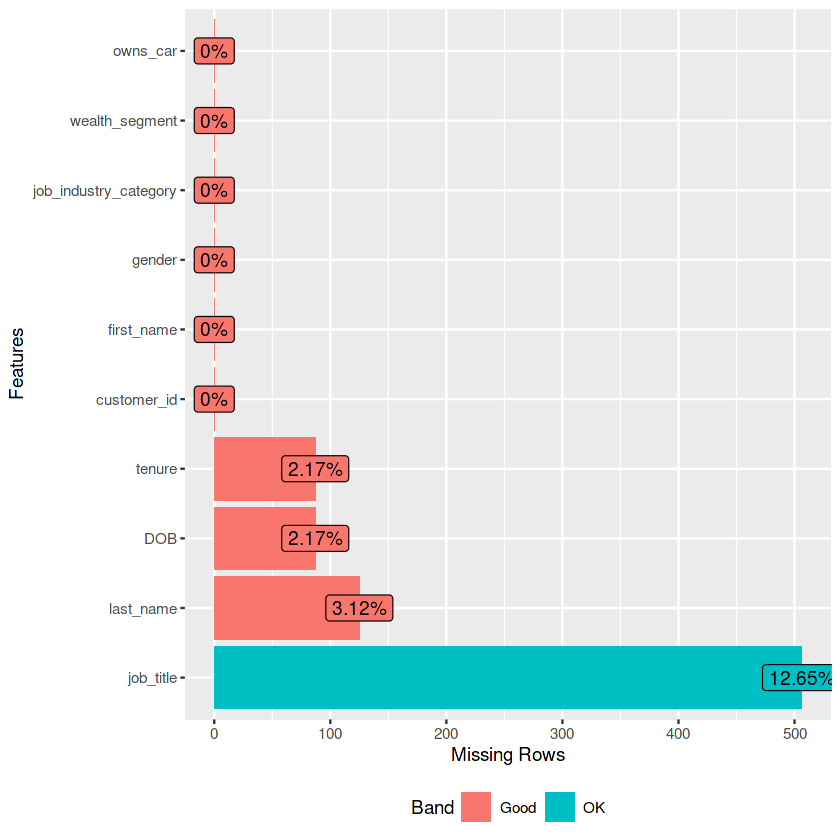

In [16]:
plot_missing(df_democ)

In [17]:
table(df_democ$job_industry_category)
table(df_democ$gender)


       Argiculture      Entertainment Financial Services             Health 
               113                136                774                602 
                IT      Manufacturing                n/a           Property 
               223                799                656                267 
            Retail Telecommunications 
               358                 72 


     F  Femal Female      M   Male      U 
     1      1   2037      1   1872     88 

In [18]:
df_democ$gender = replace(df_democ$gender, df_democ$gender == "F", "Female")
df_democ$gender = replace(df_democ$gender, df_democ$gender == "M", "Male")
df_democ$gender = replace(df_democ$gender, df_democ$gender == "Femal", "Female")
df_democ$gender = replace(df_democ$gender, df_democ$gender == "U", NA)
df_democ$job_industry_category = replace(df_democ$job_industry_category, 
                                         df_democ$job_industry_category == "n/a", NA)

In [19]:
df_democ = na.omit(df_democ)

In [20]:
df_democ$DOB = as.numeric(df_democ$DOB)
df_democ$DOB = as.Date.numeric(df_democ$DOB, "1899-12-30")

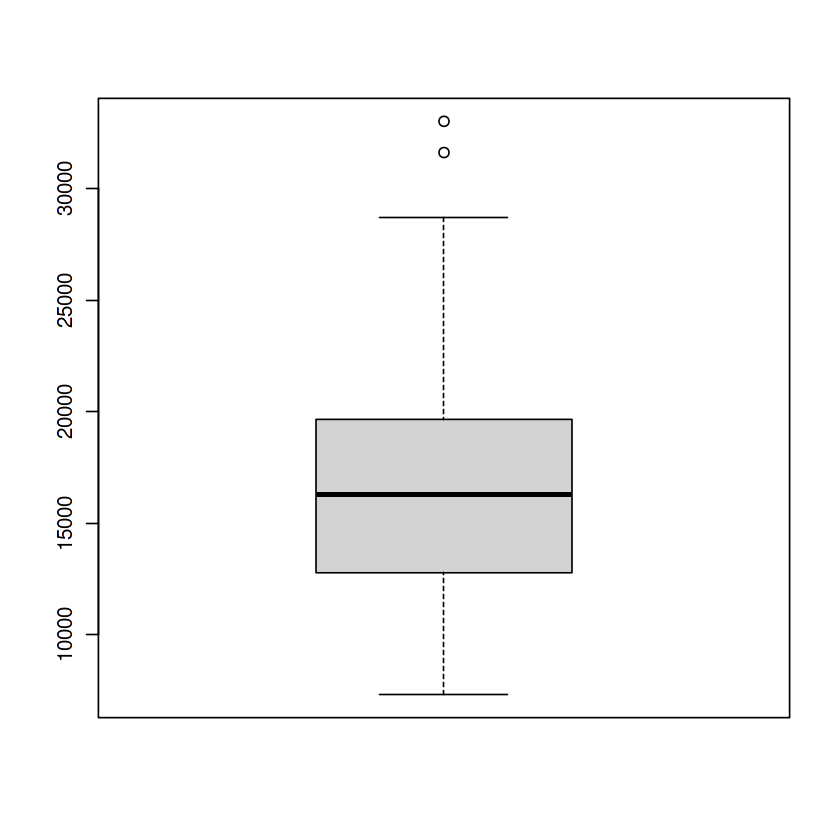

In [21]:
boxplot(as.numeric(Sys.Date() - df_democ$DOB))

In [22]:
df_democ$Age = (as.numeric(Sys.Date() - df_democ$DOB))/365

In [23]:
head(df_democ)

,customer_id,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,Age
,<dbl>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,1,Laraine,Medendorp,Female,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11,68.49589
2,2,Eli,Bockman,Male,1980-12-16,Administrative Officer,Financial Services,Mass Customer,Yes,16,41.29863
3,3,Arlin,Dearle,Male,1954-01-20,Recruiting Manager,Property,Mass Customer,Yes,15,68.22192
9,9,Mala,Lind,Female,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,Yes,8,49.07397
10,10,Fiorenze,Birdall,Female,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,Yes,20,33.47397
12,12,Sawyere,Flattman,Male,1994-07-21,Nuclear Power Engineer,Manufacturing,Mass Customer,No,8,27.69589


# 3. New Customer List

In [24]:
df_new_cus = as.data.frame(read_xlsx("../input/kpmg-virtual-internship/KPMG_VI_New_raw_data_update_final.xlsx",
                                  skip = 1, sheet = "NewCustomerList"
                                  ))

New names:
* `` -> ...17
* `` -> ...18
* `` -> ...19
* `` -> ...20
* `` -> ...21



In [25]:
str(df_new_cus)

'data.frame':	1000 obs. of  23 variables:
 $ first_name                         : chr  "Chickie" "Morly" "Ardelis" "Lucine" ...
 $ last_name                          : chr  "Brister" "Genery" "Forrester" "Stutt" ...
 $ gender                             : chr  "Male" "Male" "Female" "Female" ...
 $ past_3_years_bike_related_purchases: chr  "86" "69" "10" "64" ...
 $ DOB                                : chr  "1957-07-12" "1970-03-22" "27269" "1979-01-28" ...
 $ job_title                          : chr  "General Manager" "Structural Engineer" "Senior Cost Accountant" "Account Representative III" ...
 $ job_industry_category              : chr  "Manufacturing" "Property" "Financial Services" "Manufacturing" ...
 $ wealth_segment                     : chr  "Mass Customer" "Mass Customer" "Affluent Customer" "Affluent Customer" ...
 $ deceased_indicator                 : chr  "N" "N" "N" "N" ...
 $ owns_car                           : chr  "Yes" "No" "No" "Yes" ...
 $ tenure                

In [26]:
df_new_cus$past_3_years_bike_related_purchases = as.numeric(df_new_cus$past_3_years_bike_related_purchases)

In [27]:
head(df_new_cus)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,⋯,state,country,property_valuation,...17,...18,...19,...20,...21,Rank,Value
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,⋯,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,⋯,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
3,Ardelis,Forrester,Female,10,27269,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,⋯,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,⋯,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,⋯,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125
6,Druci,Brandli,Female,39,1951-04-29,Assistant Media Planner,Entertainment,High Net Worth,N,Yes,⋯,QLD,Australia,7,0.43,0.5375,0.5375,0.537500,6,6,1.671875


In [29]:
colnames(df_new_cus)

[1] "first_name"                          "last_name"                          
 [3] "gender"                              "past_3_years_bike_related_purchases"
 [5] "DOB"                                 "job_title"                          
 [7] "job_industry_category"               "wealth_segment"                     
 [9] "deceased_indicator"                  "owns_car"                           
[11] "tenure"                              "address"                            
[13] "postcode"                            "state"                              
[15] "country"                             "property_valuation"                 
[17] "...17"                               "...18"                              
[19] "...19"                               "...20"                              
[21] "...21"                               "Rank"                               
[23] "Value"

In [30]:
table(df_new_cus$deceased_indicator)


   N 
1000 

In [31]:
df_new_cus[,c(17,18,19,20,21)] = NULL
df_new_cus$deceased_indicator = NULL

In [32]:
table(df_new_cus$gender)
table(df_new_cus$state)


Female   Male      U 
   513    470     17 


NSW QLD VIC 
506 228 266 

In [33]:
df_new_cus$gender = replace(df_new_cus$gender, df_new_cus$gender == "U", NA)
df_new_cus$DOB = ymd(df_new_cus$DOB)

Warning message:
“ 54 failed to parse.”


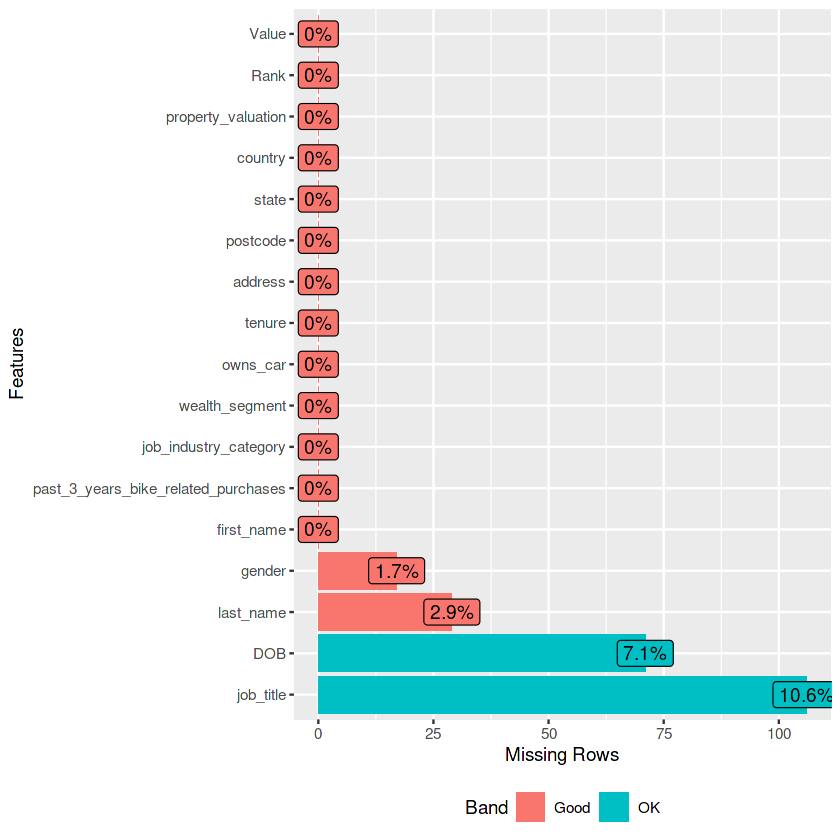

In [34]:
plot_missing(df_new_cus)

In [35]:
df_new_cus = na.omit(df_new_cus)

In [36]:
head(df_new_cus)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
,<chr>,<chr>,<chr>,<dbl>,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125
6,Druci,Brandli,Female,39,1951-04-29,Assistant Media Planner,Entertainment,High Net Worth,Yes,22,89105 Pearson Terrace,4075,QLD,Australia,7,6,1.671875
7,Rutledge,Hallt,Male,23,1976-10-06,Compensation Analyst,Financial Services,Mass Customer,No,8,7 Nevada Crossing,2620,NSW,Australia,7,6,1.671875


# 4. Transactions

In [37]:
df_tran = as.data.frame(read_xlsx("../input/kpmg-virtual-internship/KPMG_VI_New_raw_data_update_final.xlsx",
                                  skip = 1, sheet = "Transactions"
                                  ))

In [38]:
head(df_tran)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
,<dbl>,<dbl>,<dbl>,<dttm>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1,2,2950,2017-02-25,FALSE,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21,TRUE,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16,FALSE,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31,FALSE,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145
5,5,78,787,2017-10-01,TRUE,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226
6,6,25,2339,2017-03-08,TRUE,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,39031


In [39]:
str(df_tran)

'data.frame':	20000 obs. of  13 variables:
 $ transaction_id         : num  1 2 3 4 5 6 7 8 9 10 ...
 $ product_id             : num  2 3 37 88 78 25 22 15 67 12 ...
 $ customer_id            : num  2950 3120 402 3135 787 ...
 $ transaction_date       : POSIXct, format: "2017-02-25" "2017-05-21" ...
 $ online_order           : logi  FALSE TRUE FALSE FALSE TRUE TRUE ...
 $ order_status           : chr  "Approved" "Approved" "Approved" "Approved" ...
 $ brand                  : chr  "Solex" "Trek Bicycles" "OHM Cycles" "Norco Bicycles" ...
 $ product_line           : chr  "Standard" "Standard" "Standard" "Standard" ...
 $ product_class          : chr  "medium" "medium" "low" "medium" ...
 $ product_size           : chr  "medium" "large" "medium" "medium" ...
 $ list_price             : num  71.5 2091.5 1793.4 1198.5 1765.3 ...
 $ standard_cost          : num  53.6 388.9 248.8 381.1 709.5 ...
 $ product_first_sold_date: num  41245 41701 36361 36145 42226 ...


In [40]:
df_tran$product_first_sold_date = as.Date.numeric(df_tran$product_first_sold_date, "1899-12-30")

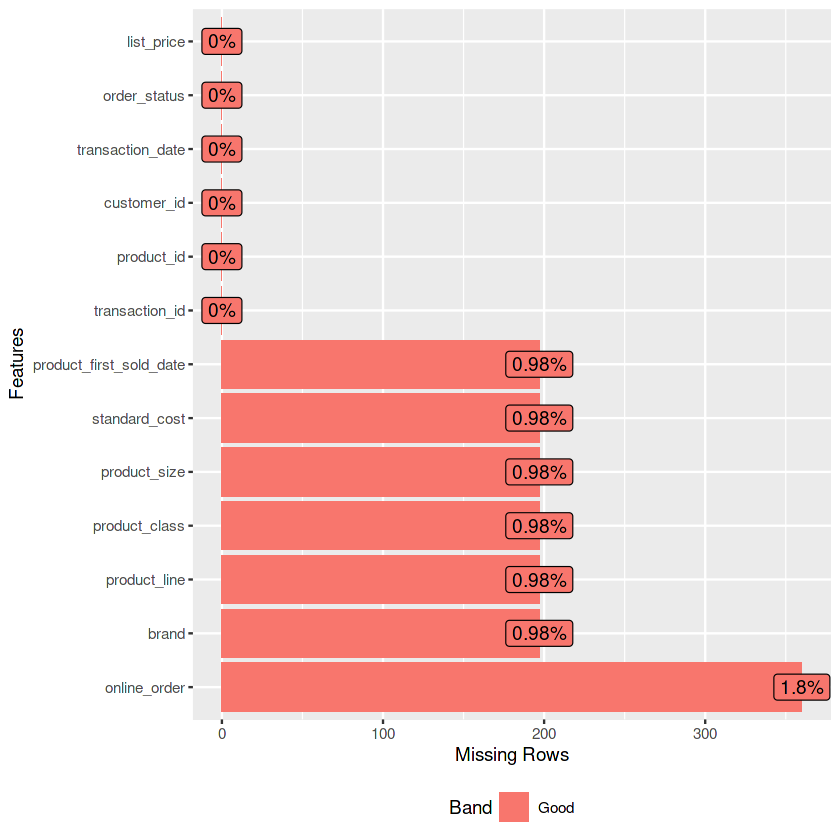

In [41]:
plot_missing(df_tran)

In [42]:
df_tran = na.omit(df_tran)

In [43]:
df_tran$Total_Price = (df_tran$list_price - df_tran$standard_cost)

In [44]:
head(df_tran)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Total_Price
,<dbl>,<dbl>,<dbl>,<dttm>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<date>,<dbl>
1,1,2,2950,2017-02-25,FALSE,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87
2,2,3,3120,2017-05-21,TRUE,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55
3,3,37,402,2017-10-16,FALSE,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61
4,4,88,3135,2017-08-31,FALSE,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36
5,5,78,787,2017-10-01,TRUE,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,1055.82
6,6,25,2339,2017-03-08,TRUE,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,2006-11-10,709.34


In [45]:
df_new = merge(df_tran, df_cus, by = "customer_id" )
df = merge(df_new, df_democ, by = "customer_id")
head(df)

,customer_id,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,⋯,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,Age
,<dbl>,<dbl>,<dbl>,<dttm>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,1,9785,72,2017-01-05,FALSE,Approved,Norco Bicycles,Standard,medium,medium,⋯,Laraine,Medendorp,Female,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11,68.49589
2,1,94,86,2017-12-23,FALSE,Approved,OHM Cycles,Standard,medium,medium,⋯,Laraine,Medendorp,Female,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11,68.49589
3,1,14931,31,2017-12-14,TRUE,Approved,Giant Bicycles,Standard,medium,medium,⋯,Laraine,Medendorp,Female,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11,68.49589
4,1,13644,25,2017-05-19,FALSE,Approved,Giant Bicycles,Road,medium,medium,⋯,Laraine,Medendorp,Female,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11,68.49589
5,1,14486,23,2017-03-27,FALSE,Approved,Norco Bicycles,Mountain,low,small,⋯,Laraine,Medendorp,Female,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11,68.49589
6,1,5157,47,2017-05-11,TRUE,Approved,Trek Bicycles,Road,low,small,⋯,Laraine,Medendorp,Female,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11,68.49589


# 5. RFM

In [46]:
refDay = max(df$transaction_date)
Recency = df %>% group_by(customer_id) %>% 
 summarise(Recency = (as.numeric(refDay)- as.numeric(max(transaction_date)))/86400)

In [47]:
Frequency = df %>% group_by(customer_id) %>% 
  summarise(Frequency = n())

In [48]:
Monetary = df %>% group_by(customer_id) %>% 
  summarise(Monetary = sum(Total_Price))

In [49]:
RFM = merge(Recency, Frequency, by = "customer_id")
RFM = merge(RFM, Monetary, by = "customer_id")
head(RFM)

,customer_id,Recency,Frequency,Monetary
,<dbl>,<dbl>,<int>,<dbl>
1,1,7,11,3018.09
2,2,128,3,2226.26
3,9,78,6,2353.11
4,12,67,7,3540.03
5,13,27,7,4337.38
6,14,47,3,1713.90


In [50]:
quantile(RFM$Recency)

0%  25%  50%  75% 100% 
   0   18   44   87  353

In [51]:
Rscore = cut(RFM$Recency, breaks = c(-1,20.5,46.5,80.5,120.5,355))
levels(Rscore) = c(5,4,3,2,1)

In [52]:
quantile(RFM$Frequency)

0%  25%  50%  75% 100% 
   1    4    5    7   14

In [53]:
Fscore = cut(RFM$Frequency, breaks = c(-1,3,5,7,10,15))
levels(Fscore) = c(1,2,3,4,5)

In [54]:
quantile(RFM$Monetary)

0%       25%       50%       75%      100% 
   15.080  1796.072  2795.780  4095.418 11668.950

In [55]:
Mscore = cut(RFM$Monetary, breaks = c(-1,500,1800,3000,5000,12000))
levels(Mscore) = c(1,2,3,4,5)

In [56]:
RFM_Scores = data.frame(customer_id = RFM$customer_id, 
                        R_scores = as.numeric(Rscore), 
                        F_scores = as.numeric(Fscore),
                        M_scores = as.numeric(Mscore))
head(RFM_Scores)

,customer_id,R_scores,F_scores,M_scores
,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,5,4
2,2,5,1,3
3,9,3,3,3
4,12,3,3,4
5,13,2,3,4
6,14,3,1,2


In [57]:
RFM = RFM_Scores$R_scores*100 + RFM_Scores$F_scores*10 + RFM_Scores$M_scores
Total_Scores = RFM_Scores$R_scores + RFM_Scores$F_scores + RFM_Scores$M_scores
RFM_Scores$RFM = RFM
RFM_Scores$Total_Scores = Total_Scores
head(RFM_Scores)

,customer_id,R_scores,F_scores,M_scores,RFM,Total_Scores
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,5,4,154,10
2,2,5,1,3,513,9
3,9,3,3,3,333,9
4,12,3,3,4,334,10
5,13,2,3,4,234,9
6,14,3,1,2,312,6


In [58]:
quantile(RFM_Scores$Total_Scores)

0%  25%  50%  75% 100% 
   3    7    8   10   14

In [59]:
Platinum = c(12,13,14)
Gold = c(9,10,11)
Silver = c(5,6,7,8)
Bronze = c(3,4)

In [60]:

for(i in 1:length(Platinum)){
  for(k in 1:nrow(RFM_Scores)){
    if(RFM_Scores$Total_Scores[k]== Platinum[i]){
      RFM_Scores$Total_Scores[k] = "Platinum"
    }
  }
}

In [61]:
for(i in 1:length(Gold)){
  for(k in 1:nrow(RFM_Scores)){
    if(RFM_Scores$Total_Scores[k]== Gold[i]){
      RFM_Scores$Total_Scores[k] = "Gold"
    }
  }
}

In [62]:
for(i in 1:length(Silver)){
  for(k in 1:nrow(RFM_Scores)){
    if(RFM_Scores$Total_Scores[k]== Silver[i]){
      RFM_Scores$Total_Scores[k] = "Silver"
    }
  }
}

In [63]:
for(i in 1:length(Bronze)){
  for(k in 1:nrow(RFM_Scores)){
    if(RFM_Scores$Total_Scores[k]== Bronze[i]){
      RFM_Scores$Total_Scores[k] = "Bronze"
    }
  }
}

In [64]:
head(RFM_Scores)

,customer_id,R_scores,F_scores,M_scores,RFM,Total_Scores
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,1,5,4,154,Gold
2,2,5,1,3,513,Gold
3,9,3,3,3,333,Gold
4,12,3,3,4,334,Gold
5,13,2,3,4,234,Gold
6,14,3,1,2,312,Silver


In [65]:
table(RFM_Scores$Total_Scores)


  Bronze     Gold Platinum   Silver 
      60     1055      153     1178 